In [ ]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.preprocessing import StandardScaler


#### **Question 1.1**
#####**Answer**
There are 10 different cell nuclei parameters:


1.   Radius : Distance from the centre to the perimeter
2.   Perimeter: The value of core tumor. The total distance between the points give perimeter.
3.   Area: area of cancer cells
4.   Smoothness: this gives the local variation in the radius lengths. The smoothness is given by difference of radial length and mean lengths of the lines around it.
5.   Compactness: It is value of estimation of perimeter and area,it is given by perimeter^2 / area - 1.0
6.   Concavity: Severity of concave points is given . Smaller chords encapsulate small concavities better. This feature is affected by length
7.  Concave points: The concavity measures magnitude of contour concavities while concave points measures the number of concave points
8. Symmetry: The longest chord is taken as major axis.The length difference between the line perpendicular to the major axis is taken. This is known as the symmetry.
9. Fractal dimension:It is a measure of non linear growth. As the ruler used to measure the perimeter increases, the precision decreases and hence the perimeter decreases. This data is plotted using log scale and the downward slope gives us an approximation of fractal dimension
10. Texture: standard derivation of the gray scale area. This is helpful to find out the variation.

Higher value of all the shape features imply irregular contour which in turn implies a malignant cell. 
The worst and error values are taken because only few malignant cells maybe present in an given sample.To better correlate malignant cells, these values are taken. The surgery depends on the size of tumour hence worst values are necessary. 





In [ ]:
#loading the dataset and converting it into dataframe as dataframes are easier to manipulate and analyse the data
data = load_breast_cancer()
a=np.c_[data.data, data.target]
columns = np.append(data.feature_names, ["target"])
df_cancer=pd.DataFrame(a,columns=columns)


In [ ]:
#The head() shows top 5 rows of our dataframe, using this to see if the data has been correctly converted into dataframe and different column names and getting the sense of our data
df_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [ ]:
# Dividing the data into two classes malignant, according to our dataset benign has target value 1 and malignant has target value 0
Malignant=df_cancer[df_cancer['target'] ==0]
Benign=df_cancer[df_cancer['target'] ==1]

In [ ]:
# Creating lists for the names of features by dividing them into three categories
mean_features= ['mean radius','mean texture','mean perimeter','mean area','mean smoothness','mean compactness', 'mean concavity','mean concave points','mean symmetry', 'mean fractal dimension']
error_features=['radius error',
 'texture error',
 'perimeter error',
 'area error',
 'smoothness error',
 'compactness error',
 'concavity error',
 'concave points error',
 'symmetry error',
 'fractal dimension error']
worst_features=['worst radius',
 'worst texture',
 'worst perimeter',
 'worst area',
 'worst smoothness',
 'worst compactness',
 'worst concavity',
 'worst concave points',
 'worst symmetry',
 'worst fractal dimension']


In [ ]:
# Created a function to plot histograms with 10 subplots, creating functions for tasks reduces space complexity
bins = 20 #Number of bins is set to 20, bins are specified to divide the range of values into intervals
def histogram(features):
  plt.figure(figsize=(10,15))
  for i, feature in enumerate(features):
      plt.subplot(5, 2, i+1)  #subplot function the number of rows are given as 5 and number of columns as 2, the value i+1 gives the subplot number, subplot numbers start with 1
      sns.distplot(Malignant[feature], bins=bins, color='red', label='Malignant');
      sns.distplot(Benign[feature], bins=bins, color='green', label='Benign');
      plt.title(str(' Density Plot of:  ')+str(feature))
      plt.xlabel('X variable')
      plt.ylabel('Density Function')
      plt.legend(loc='upper right')
  plt.tight_layout()
  plt.show()

**Answer 1.2**



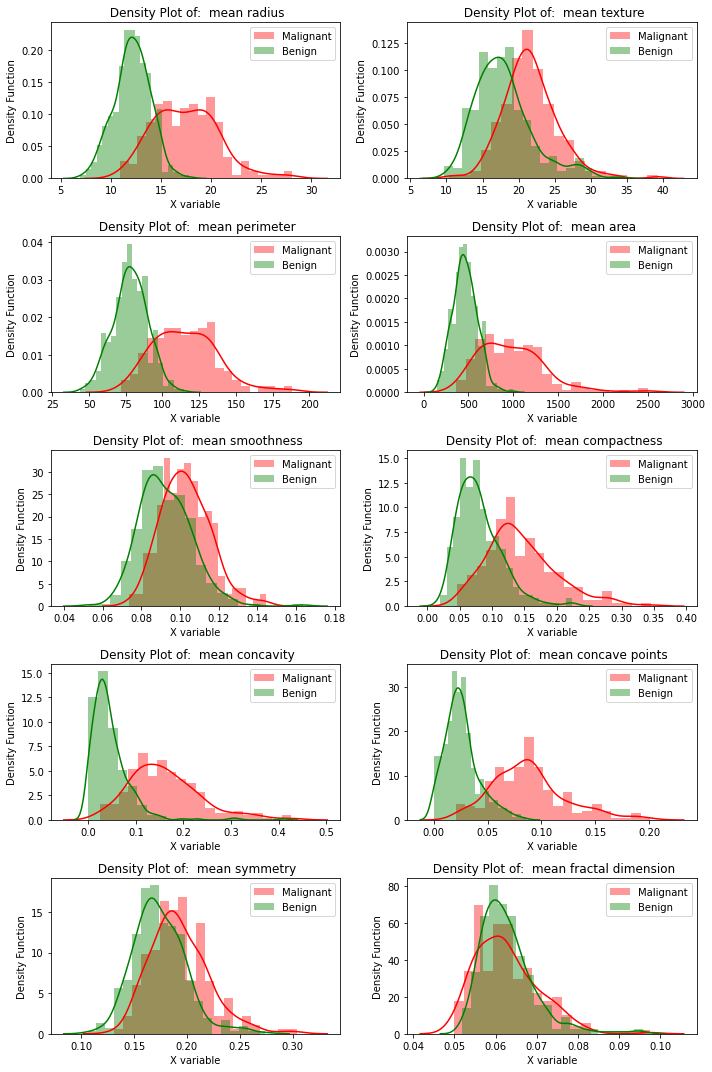

In [ ]:
#Calling the function with the parameter mean features
histogram(mean_features)

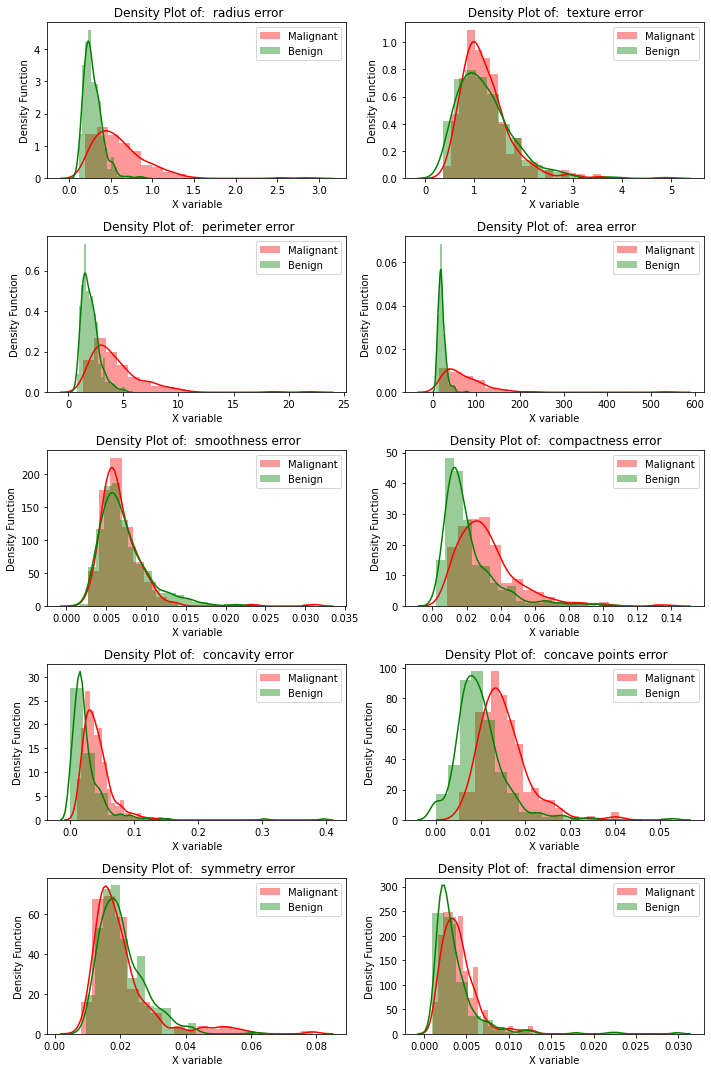

In [ ]:
histogram(error_features)

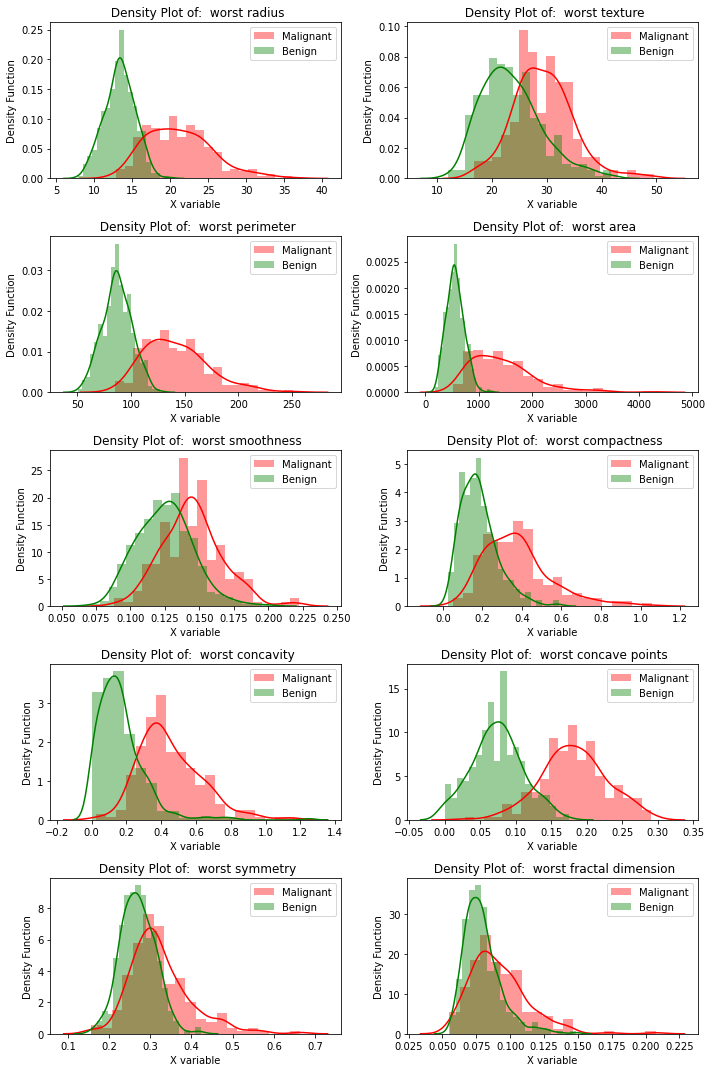

In [ ]:
histogram(worst_features)

In [ ]:
#Created a function for ROC Curves
def ROC_curve(X,Y,string):
  X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4)  # Splitting the data for training and testing in 60/40 ratio
  model=LogisticRegression(solver='liblinear') #Using logistic regression model
  model.fit(X_train,y_train)
  probability=model.predict_proba(X_test) #Predicting probability
  fpr, tpr, thresholds = roc_curve(y_test, probability[:,1]) #False positive rate, True Positive Rate and Threshold is returned using this function
  roc_auc = auc(fpr, tpr) #The area under the curve is given by this function
  plt.figure()
  plt.plot(fpr, tpr, lw=1, color='green', label=f'AUC = {roc_auc:.3f}')
  plt.plot([0,1],[0,1],linestyle='--',label='Baseline') #Plotting the baseline
  plt.title(string)
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate ')
  plt.legend()
  plt.show()


**Answer 1.3**

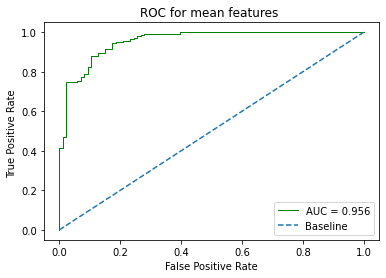

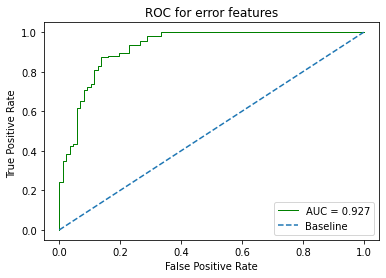

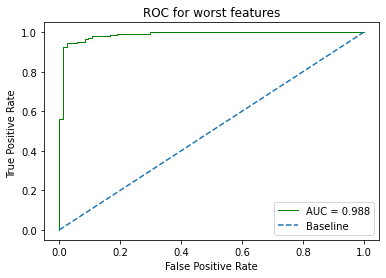

In [ ]:
ROC_curve(df_cancer[mean_features],df_cancer['target'],'ROC for mean features ')
ROC_curve(df_cancer[error_features],df_cancer['target'],'ROC for error features')
ROC_curve(df_cancer[worst_features],df_cancer['target'],'ROC for worst features')

### **Question 1.4**
According to ROC Curves the features with highest area under the ROC Curve show highest accuracy. Here we can see the worst and mean features are showing very high accuracy.
When studying the histograms we need to find the ones which have the least intersecting area between the two classes. 
As it will be easier to classify if there is a clear distinction of X variable values.
A huge density difference between values of two classes can also help in distinction which shows most of the objects lie in a particular class for a particular X variable
The top 5 features according to this are:


*   Worst area
*   Worst perimeter
*   Worst radius
*   Mean Concave Points
*   Mean Concavity








In [ ]:
#The mean of all the instances of all features for both Benign and Malignant classes 
m_feature_space=Malignant.mean(axis=0)
b_feature_space=Benign.mean(axis=0)

In [ ]:
m_feature_space.head()

mean radius         17.462830
mean texture        21.604906
mean perimeter     115.365377
mean area          978.376415
mean smoothness      0.102898
dtype: float64

In [ ]:
b_feature_space.head()

mean radius         12.146524
mean texture        17.914762
mean perimeter      78.075406
mean area          462.790196
mean smoothness      0.092478
dtype: float64

**Answer 1.5**

In [ ]:
# Concatenate the two dataframes one with Benign and one with Malignant and calculate the mean between the values
z=pd.concat([m_feature_space,b_feature_space],axis=1)
analysis_point=z.mean(axis=1)
analysis_point.head() #Analysis point 

mean radius         14.804677
mean texture        19.759834
mean perimeter      96.720392
mean area          720.583306
mean smoothness      0.097688
dtype: float64

In [ ]:
#Creating X and Y, where X has all the features and Y contains target
X=df_cancer.drop(['target'],axis=1)
Y=df_cancer['target']

#####**Answer 2.1**
Used the grid search method for,for the hyperparameter search of the features max_depth and min_leaf.
Specified a value for max_features, max_features gives us how many features should be taken a time when taking the best split, if we have too many features it will have computationally heavy.
Taking the value of 10, as we have 30 features.
The min_samples_split is used to control overfitting, the ideal value for it should be between 1 to 40.If the value is too low we see overfitting

####**Answer 2.2**
Built a pipeline from the imblearn library as it can also include oversampling technique.Decison Trees don't generally require scaling but I have used it here to compare the decision tree with SVM.There is no drastic change in decision trees with scaling. The different class sizes might result in bias, althought the difference is not very huge, it still is better to have a balanced class dataset. I have applied oversampling using the smote function to solve this problem. The oversampling technique increases the data by replicating the original data to get a balanced dataset.

####**Answer 2.3**
The max_depth for a decision tree should be equal to or less than the squareroot of the instances for most optimum case,hence I chose the range of 1 to 24. If the depth is too large we see overfitting and if too low we see underfitting.
The min_samples_leaf gives the minimum samples to become a leaf node. Too low value will give overfitting and too large value will make it computationally expensive,hence I took the range to be 1 to 20.

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
max_depth = list(range(1,24))
min_leaf=list(range(1,20))
params = [{'classifier__max_depth':max_depth,'classifier__min_samples_leaf':min_leaf}] #Defining parameters for the grid search
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4) 
pipe=Pipeline([('sc',StandardScaler()),('smt',SMOTE()),('classifier',DecisionTreeClassifier(random_state=0,min_samples_split=6,max_features=10))]) #Creating a pipeline
grid_search_cv = GridSearchCV(pipe,params,scoring='accuracy',refit=True, verbose=1,cv=5) #Grid Search function which will put different combinations of the parameters
grid_search_cv.fit(X_train,y_train)

Fitting 5 folds for each of 437 candidates, totalling 2185 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('sc',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('smt',
                                        SMOTE(k_neighbors=5, kind='deprecated',
                                              m_neighbors='deprecated',
                                              n_jobs=1, out_step='deprecated',
                                              random_state=None, ratio=None,
                                              sampling_strategy='auto',
                                              svm_estimator='deprecated')),
                                       ('classifier',
                                        DecisionTreeClassi...
                                             

In [ ]:
model=grid_search_cv.best_estimator_  #Finding the best model from grid search


In [ ]:
from sklearn.metrics import accuracy_score 
model.fit(X_train,y_train) #Fitting the model 
test_pred = model.predict(X_test)
print(accuracy_score(y_test, test_pred)) #accuracy score function, to print the accuracy of the model
y_test.value_counts()

0.9429824561403509


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


1.0    136
0.0     92
Name: target, dtype: int64

In [ ]:
params=model.get_params()
print(params)

{'memory': None, 'steps': [('sc', StandardScaler(copy=True, with_mean=True, with_std=True)), ('smt', SMOTE(k_neighbors=5, kind='deprecated', m_neighbors='deprecated', n_jobs=1,
      out_step='deprecated', random_state=None, ratio=None,
      sampling_strategy='auto', svm_estimator='deprecated')), ('classifier', DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=10, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best'))], 'verbose': False, 'sc': StandardScaler(copy=True, with_mean=True, with_std=True), 'smt': SMOTE(k_neighbors=5, kind='deprecated', m_neighbors='deprecated', n_jobs=1,
      out_step='deprecated', random_state=None, ratio=None,
      sampling_strategy='auto', svm_est

####**Answer 3.1**
Failing to detect a sample which has cancer,means we look at the intersection of cancer and predicted no cancer. The number is 4 out of 91. When a person has cancer and it is detected as no cancer, the chance of happening so is 0.043.
The weakness of the classifier is the computational overhead.
The strength is the classifier shows good accuracy and chances of detecting a sample as no cancer while it is cancer is not very much which is desired in this case. 

In [ ]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report 
matrix=np.array(confusion_matrix(y_test,test_pred,labels=[0,1])) #Creating confusion matrix
pd.DataFrame(matrix,index=['Cancer','No Cancer'],columns=['Predicted_Cancer','Predicted_No_Cancer']) #Labelling the matrix

,Predicted_Cancer,Predicted_No_Cancer
Cancer,87,4
No Cancer,7,130


In [ ]:
print(classification_report(y_test, test_pred))     #The classification report gives precision,recall and f-1 score


              precision    recall  f1-score   support

         0.0       0.93      0.96      0.94        91
         1.0       0.97      0.95      0.96       137

    accuracy                           0.95       228
   macro avg       0.95      0.95      0.95       228
weighted avg       0.95      0.95      0.95       228



####**Answer 3.2**
It is a tree flowchart, each observation splits according to some feature. There are two ways to go from each node if the condition is true it goes one way and if false it goes the other way.
The first line(here X7),gives the feature and compares it to some value.
The second row gives us the value of gini index at every node.Gini index is computed mathematically. Gini index=0 means the node is perfect and we get definite class. The sample row gives us the number of samples being considered.
The value row in each node gives us the number of samples in each class.
In all the nodes the features are considered but the feature which gives best gini index is chosen.

[Text(1116.0, 1993.2, 'X[7] <= 0.128\ngini = 0.5\nsamples = 440\nvalue = [220, 220]'),
 Text(558.0, 1630.8000000000002, 'X[23] <= 0.083\ngini = 0.182\nsamples = 227\nvalue = [23, 204]'),
 Text(279.0, 1268.4, 'X[1] <= 0.488\ngini = 0.057\nsamples = 205\nvalue = [6, 199]'),
 Text(139.5, 906.0, 'gini = 0.0\nsamples = 163\nvalue = [0, 163]'),
 Text(418.5, 906.0, 'X[27] <= -0.302\ngini = 0.245\nsamples = 42\nvalue = [6, 36]'),
 Text(279.0, 543.5999999999999, 'X[17] <= -0.261\ngini = 0.062\nsamples = 31\nvalue = [1, 30]'),
 Text(139.5, 181.19999999999982, 'gini = 0.0\nsamples = 21\nvalue = [0, 21]'),
 Text(418.5, 181.19999999999982, 'gini = 0.18\nsamples = 10\nvalue = [1, 9]'),
 Text(558.0, 543.5999999999999, 'gini = 0.496\nsamples = 11\nvalue = [5, 6]'),
 Text(837.0, 1268.4, 'X[24] <= -0.355\ngini = 0.351\nsamples = 22\nvalue = [17, 5]'),
 Text(697.5, 906.0, 'gini = 0.48\nsamples = 10\nvalue = [6, 4]'),
 Text(976.5, 906.0, 'gini = 0.153\nsamples = 12\nvalue = [11, 1]'),
 Text(1674.0, 1630.8

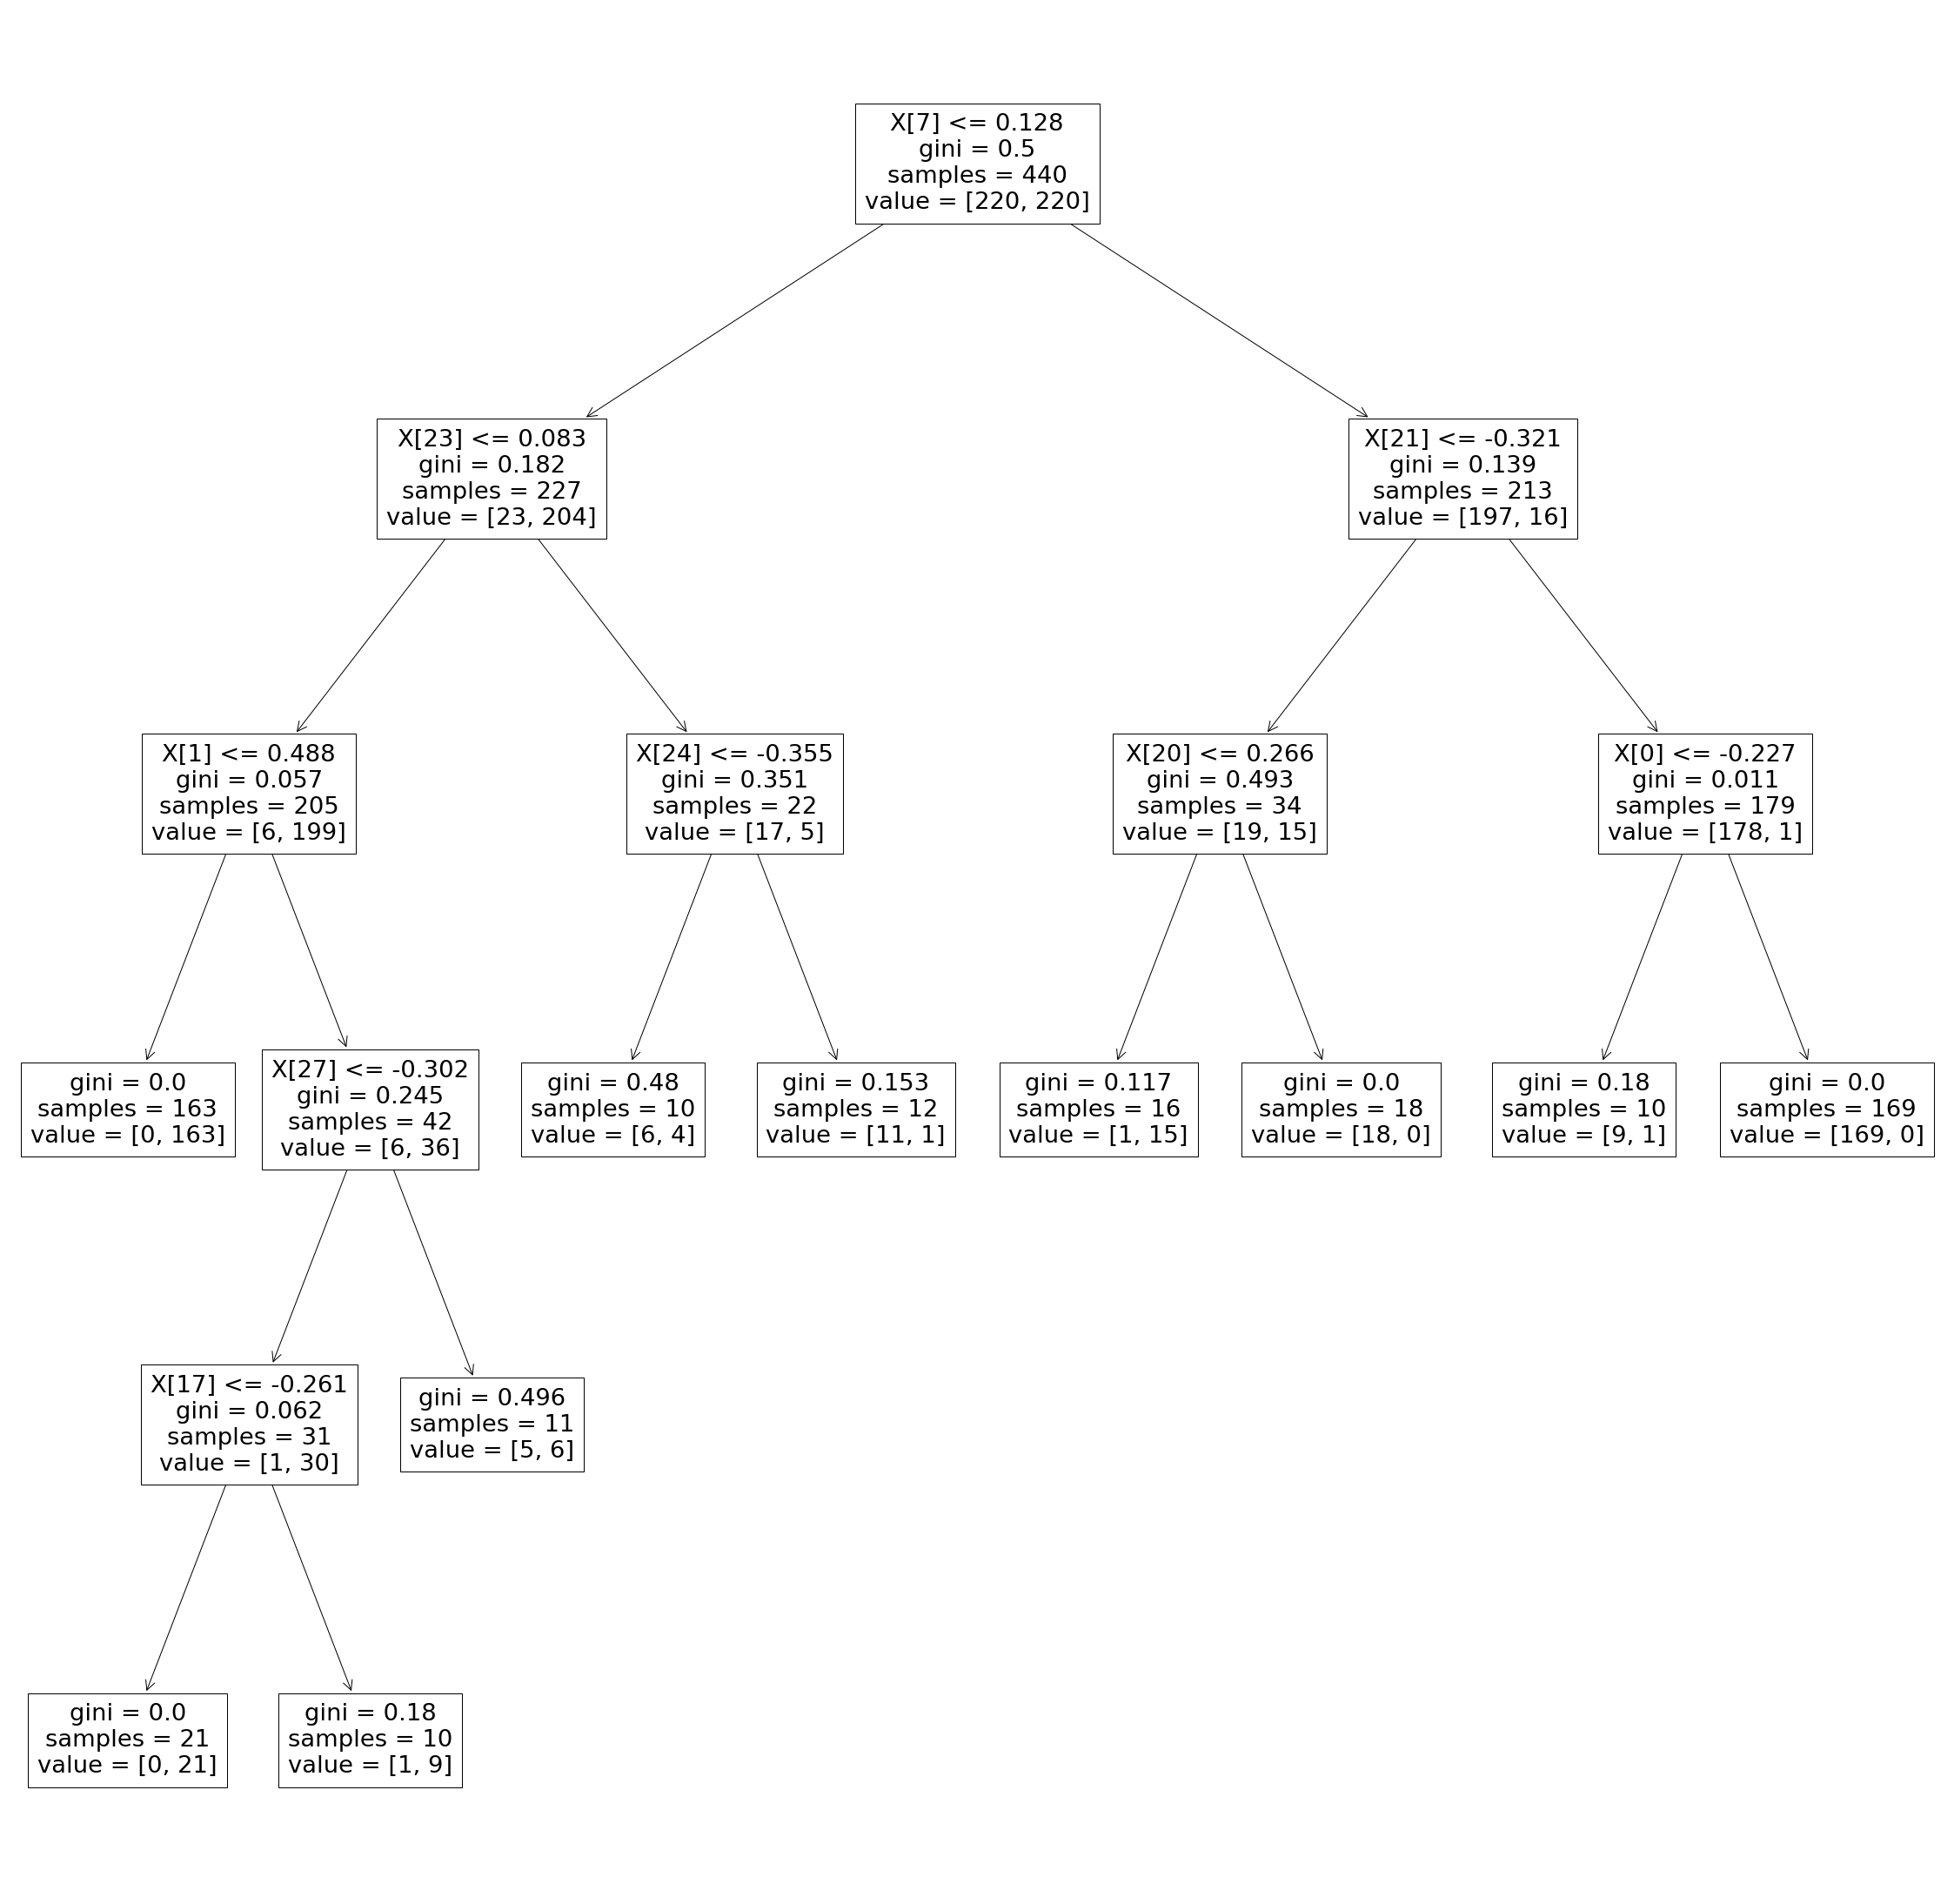

In [ ]:
from sklearn import tree
plt.figure(figsize=(40,40))
tree.plot_tree(model['classifier']) #function used to plot decision tree

#### **Answer 3.3**




/usr/local/lib/python3.6/dist-packages/sklearn/tree/_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/tree/_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/tree/_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/tree/_classes.py:301: FutureWarning: The min_impurity_split parameter is depr

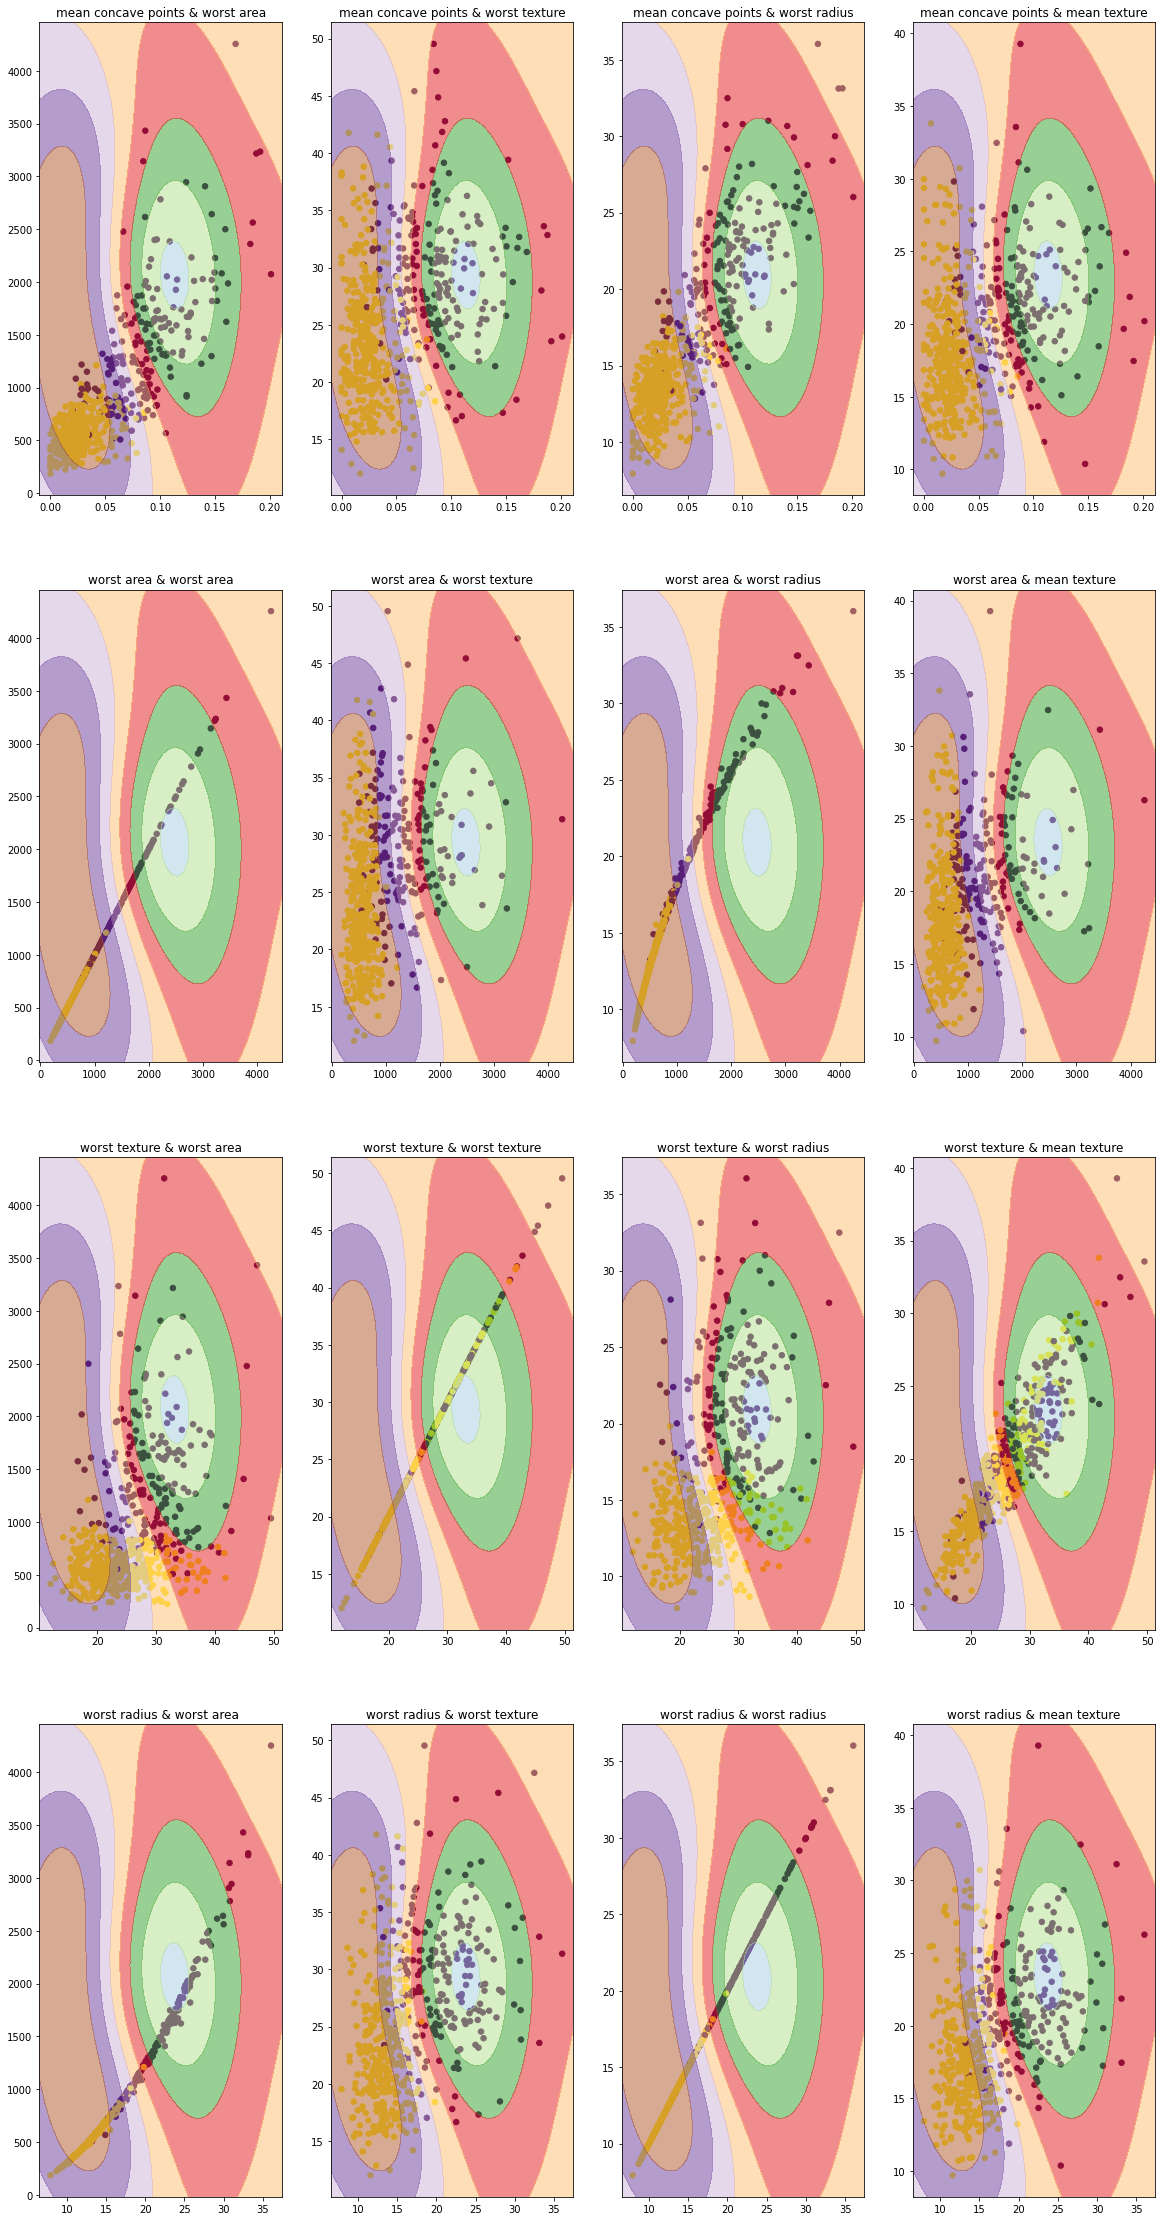

In [ ]:
clf=DecisionTreeClassifier(random_state=0,min_samples_leaf=2,min_impurity_split=6,max_depth=11) #Replicating the decision tree classifier as our classifier had max_features as 10 which can not be applied here, as the features taken are 2
k=1
plt.figure(figsize=(20,40))
for i in range(0,4): 
  for j in range(1,5):
    inp=pd.concat([X[imp_features[i]],X[imp_features[j]]],axis=1) #Taking data from two features
    clf.fit(inp,Y)
    plt.subplot(4, 4, k)
    k=k+1
    plt.scatter(X[imp_features[i]], X[imp_features[j]], c=Y, s=30) #Creating scatter plot
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),np.linspace(ylim[0], ylim[1], 50)) #Creating a meshgrid of data points
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z,alpha=0.5, cmap=plt.cm.Paired, linestyles=['--','+','--'])
    plt.title(str(imp_features[i])+' & '+str(imp_features[j]))



mean concave points    0.756231
worst area             0.138760
worst texture          0.072523
worst radius           0.019084
mean texture           0.010388
dtype: float64


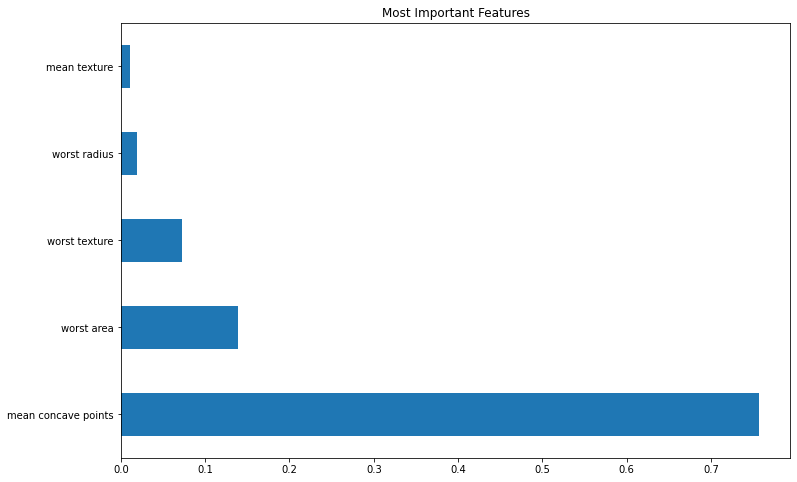

In [ ]:
feat_importances = pd.Series(model['classifier'].feature_importances_, index=X.columns) #function to save the most important features
feat_importances = feat_importances.nlargest(5) #as we need only 5 features nlargest() is used
feat_importances.plot(kind='barh',figsize=(12,8),title='Most Important Features') #plotting bar graph

imp_features=list(feat_importances.index)
print(feat_importances)

####**Answer 4.1**
The search is done using gridsearch for the best values of C and gamma.
####**Answer 4.2**
The data needs to be scaled for a support vector machine.If one feature has very large values it will dominate the SVM, as SVM classifies by maximizing the distance between seperating plane and support vectors.
To overcome the imbalanced data problem, I have used SMOTE oversampling technique.
####**Answer 4.3**
Both the C value and gamma in the range of 10. C is a regularization parameter so I chose the range as 0.01,0.1,1 and 10.  Similarly for gamma I chose 0.01,0.1,1 and 10, value less than 0.01 would have been too low and value more than 10 would have been too high. Hence I chose this range. Gridsearch CV gives the best combination of these two features.

In [ ]:
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
c=[0.01,0.1,1,10]
gamma=[0.01,0.1,1,10]
params = [{'classifier__C':c,'classifier__gamma':gamma}] #Setting the parameters
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4)
pipe=Pipeline([('sc',StandardScaler()),('smt',SMOTE()),('classifier',SVC(kernel='rbf'))]) #Creating the pipeline
grid_search_cv = GridSearchCV(pipe,params,refit=True, verbose=1,cv=5)
grid_search_cv.fit(X_train,y_train)


Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('sc',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('smt',
                                        SMOTE(k_neighbors=5, kind='deprecated',
                                              m_neighbors='deprecated',
                                              n_jobs=1, out_step='deprecated',
                                              random_state=None, ratio=None,
                                              sampling_strategy='auto',
                                              svm_estimator='deprecated')),
                                       ('classifier',
                                        SVC(C=1.0, break_ti...
                                            

In [ ]:
svc=grid_search_cv.best_estimator_ #Saving the best estimator
svc.fit(X_train,y_train)
test_pred = svc.predict(X_test)
print(accuracy_score(y_test, test_pred))


0.9868421052631579


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


#### **Answer 5.1**
People that have cancer but are predicted with no cancer are 3 out of 91 in this model, which is better than the decision tree classifier.The chances of failing to detect cancer is 0.03. The advantage of support vector classifier is it is relatively more efficient.The disadvantage is we need to scale the data before using it as support vector machine can show bias towards a feature if the data is not scaled.



In [ ]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report 
matrix=np.array(confusion_matrix(y_test,test_pred,labels=[0,1]))
pd.DataFrame(matrix,index=['Cancer','No Cancer'],columns=['Predicted_Cancer','Predicted_No_Cancer'])

,Predicted_Cancer,Predicted_No_Cancer
Cancer,88,3
No Cancer,0,137


In [ ]:
print(classification_report(y_test, test_pred))


              precision    recall  f1-score   support

         0.0       1.00      0.97      0.98        91
         1.0       0.98      1.00      0.99       137

    accuracy                           0.99       228
   macro avg       0.99      0.98      0.99       228
weighted avg       0.99      0.99      0.99       228



####**Answer 5.2**
####**Answer 5.3**
The support vector define the hyperplane which maximizes the margin between two classes. In a diagram the support vector show the margin of hyperplane

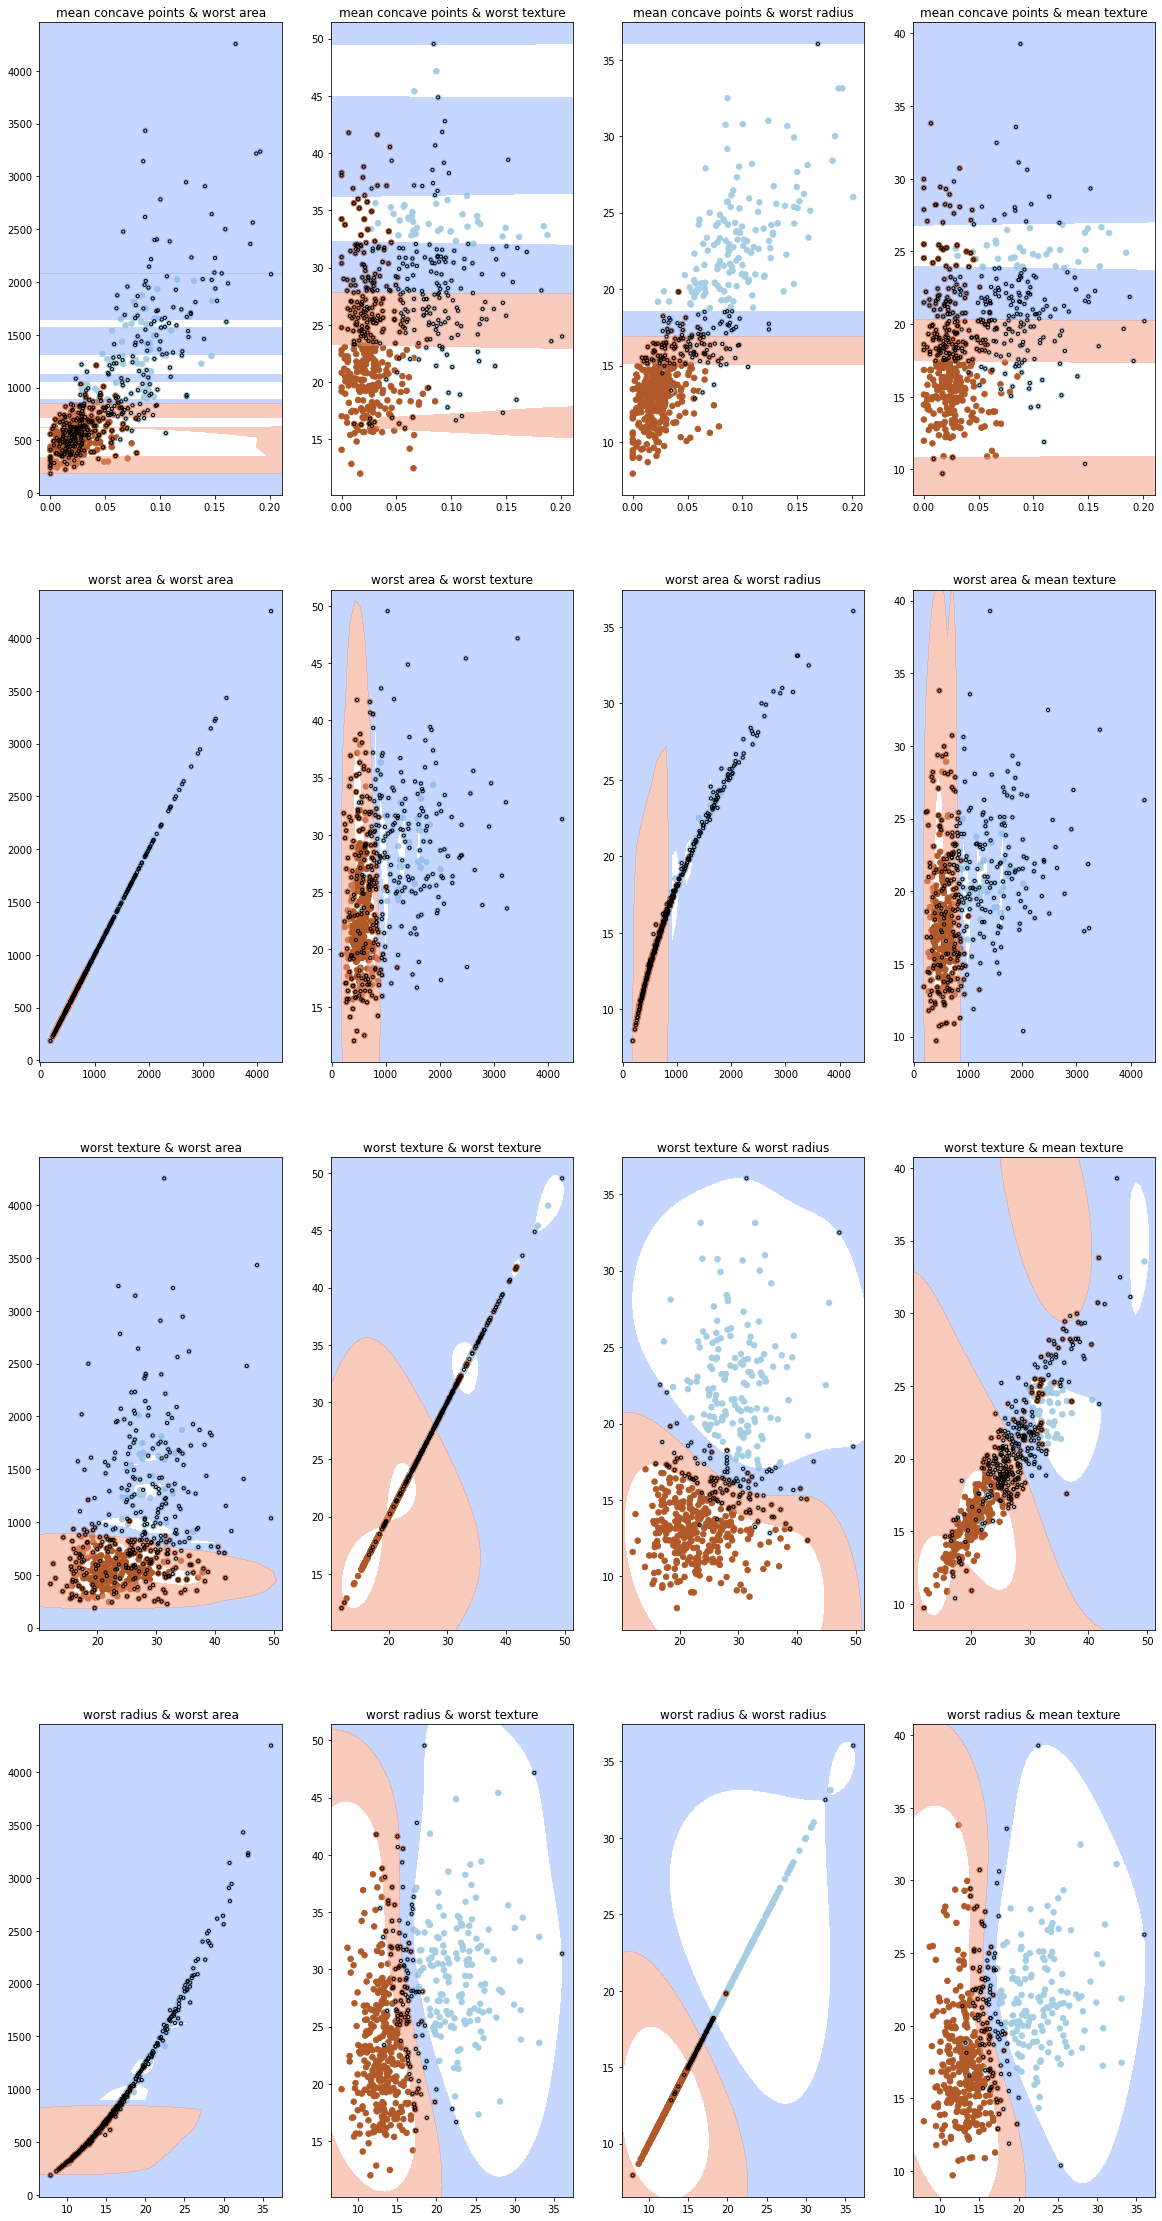

In [ ]:
k=1
plt.figure(figsize=(20,40))
for i in range(0,4): 
  for j in range(1,5):
    inp=pd.concat([X[imp_features[i]],X[imp_features[j]]],axis=1)
    s=svc['classifier'].fit(inp,Y)
    decision_function = svc['classifier'].decision_function(inp)
    plt.subplot(4, 4, k)
    k=k+1
    plt.scatter(X[imp_features[i]], X[imp_features[j]], c=Y, s=30, cmap=plt.cm.Paired)
    ax = plt.gca()

    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),np.linspace(ylim[0], ylim[1], 50))
    xy = np.vstack([xx.ravel(), yy.ravel()]).T
    Z = svc['classifier'].decision_function(xy).reshape(xx.shape)
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, levels=[-1, 0, 1], alpha=0.5,linestyles=['--', '-', '--'])
    ax.scatter(s.support_vectors_[:, 0], s.support_vectors_[:, 1], s=10,linewidth=1, facecolors='none', edgecolors='k') #Showing support vectors
    plt.title(str(imp_features[i])+' & '+str(imp_features[j]))



####**Answer 6.2**
The model is not showing overfitting as it is giving good accuracy in testing data as well.
Overfitting occurs when the accuracy in training data is very high but in test data is low.